## Алгоритм Канни (Используем разные пороги для создания датасета)

In [ ]:
#Как определить пороги Канни? https://www.pyimagesearch.com/2015/04/06/zero-parameter-automatic-canny-edge-detection-with-python-and-opencv/
https://docs.opencv.org/3.1.0/da/d22/tutorial_py_canny.html
https://stackoverflow.com/questions/21324950/how-to-select-the-best-set-of-parameters-in-canny-edge-detection-algorithm-imple
https://henrydangprg.com/2016/12/11/canny-edge-detection-in-python-with-opencv/

In [111]:
import cv2
import numpy as np
import pandas as pd
import argparse
import glob
from PIL import Image, ImageDraw #Подключим необходимые библиотеки. 

#Определяем размер изображения и записываем характеристики пикселя в массив pix
image = Image.open("16_9_35_557.bmp") #Открываем изображение. 
draw = ImageDraw.Draw(image) #Создаем инструмент для рисования. 
pix = image.load()

#cv2 для определения Канни
#"16_9_35_557.bmp"
image = cv2.imread("16_9_35_557.bmp")
height, width, channels = image.shape
print(height, width, channels)

cv2.imshow("Original", image)
 
def auto_canny(image, sigma=0.33):
    # обрабатывает вычисление медианы интенсивности пикселей в изображении
    v = np.median(image)
 
    # берем это медианное значение и строим два порога,
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper, 5)
    print(lower)
    print(upper)
 
    # return the edged image
    return edged


# преобразуем изображение в оттенки серого
#рименим размытие по Гауссу с  ядром 3 x 3, чтобы помочь удалить высокочастотный шум
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # cv2.COLOR_BGR2HSV BGR2GRAY
blurred = cv2.GaussianBlur(gray, (3, 3), 0)
 


can_1 = cv2.Canny(blurred, 10, 200) #Широкий 
can_2 = cv2.Canny(blurred, 200, 250) #В обтяжку
can_3 = cv2.Canny(blurred, 50, 250)
can_4 = cv2.Canny(blurred, 120, 240)
can_5 = cv2.Canny(blurred, 130, 180)
can_6 = cv2.Canny(blurred, 100, 150)
auto = auto_canny(blurred)

    
#ret,thresh = cv2.threshold(gray,127,255,0)
#Выбираем контуры из auto
im2, contours, hierarchy = cv2.findContours(auto,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

dd = cv2.drawContours(image, contours, -1, (240,0,0), 3)
#cv2.imshow("sdv", dd)
    

    
# show the images
cv2.imshow("Original_grey", blurred)
cv2.imshow("can_1", can_1)
cv2.imshow("can_2", can_2)
cv2.imshow("can_3", can_3)
cv2.imshow("can_4", can_4)
cv2.imshow("can_5", can_5)
cv2.imshow("can_6", can_6)
cv2.imshow("Edges_auto", auto)


cv2.waitKey(0)
cv2.destroyAllWindows()


576 768 3
86
171


In [40]:
can_1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [42]:
height, widhth = can_1.shape
print(height, widhth)

576 768


## Формирование датасета (вектора признаков)

In [5]:
#Формирование заголовков датасета по 7 алгоритмам + окрестность 3*3 для каждого пикселя

algs = ["can_1", "can_2", "can_3", "can_4", "can_5", "can_6",  "auto"]
df_columns = []
index = ["11", "12", "13", "21", "22", "23", "31", "32", "33"]
df = pd.DataFrame()

for alg in algs:
    for ind in index:
        df_column = pd.DataFrame(columns = [alg+"_"+ind])
        df = pd.concat([df, df_column])
        

C:\Users\yaroslav\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  if __name__ == '__main__':


In [154]:
#Пусатя шапка датасета
df

,auto_11,auto_12,auto_13,auto_21,auto_22,auto_23,auto_31,auto_32,auto_33,can_1_11,...,can_5_33,can_6_11,can_6_12,can_6_13,can_6_21,can_6_22,can_6_23,can_6_31,can_6_32,can_6_33


In [43]:
#Матрица признаков

dffm

,auto_11,auto_12,auto_13,auto_21,auto_22,auto_23,auto_31,auto_32,auto_33,can_1_11,...,can_5_33,can_6_11,can_6_12,can_6_13,can_6_21,can_6_22,can_6_23,can_6_31,can_6_32,can_6_33
0,-999,-999,-999,-999,0,0,-999,0,0,-999,...,0,-999,-999,-999,-999,0,0,-999,0,0
1,-999,-999,-999,0,0,0,0,0,0,-999,...,0,-999,-999,-999,0,0,0,0,0,0
2,-999,-999,-999,0,0,0,0,0,0,-999,...,0,-999,-999,-999,0,0,0,0,0,0
3,-999,-999,-999,0,0,0,0,0,0,-999,...,0,-999,-999,-999,0,0,0,0,0,0
4,-999,-999,-999,0,0,0,0,0,0,-999,...,0,-999,-999,-999,0,0,0,0,0,0
5,-999,-999,-999,0,0,0,0,0,0,-999,...,0,-999,-999,-999,0,0,0,0,0,0
6,-999,-999,-999,0,0,0,0,0,0,-999,...,0,-999,-999,-999,0,0,0,0,0,0
7,-999,-999,-999,0,0,0,0,0,0,-999,...,0,-999,-999,-999,0,0,0,0,0,0
8,-999,-999,-999,0,0,0,0,0,0,-999,...,0,-999,-999,-999,0,0,0,0,0,0
9,-999,-999,-999,0,0,0,0,0,0,-999,...,0,-999,-999,-999,0,0,0,0,0,0


In [161]:
#Пропусков нет
dff.isnull().sum()

auto_11     0
auto_12     0
auto_13     0
auto_21     0
auto_22     0
auto_23     0
auto_31     0
auto_32     0
auto_33     0
can_1_11    0
can_1_12    0
can_1_13    0
can_1_21    0
can_1_22    0
can_1_23    0
can_1_31    0
can_1_32    0
can_1_33    0
can_2_11    0
can_2_12    0
can_2_13    0
can_2_21    0
can_2_22    0
can_2_23    0
can_2_31    0
can_2_32    0
can_2_33    0
can_3_11    0
can_3_12    0
can_3_13    0
           ..
can_3_31    0
can_3_32    0
can_3_33    0
can_4_11    0
can_4_12    0
can_4_13    0
can_4_21    0
can_4_22    0
can_4_23    0
can_4_31    0
can_4_32    0
can_4_33    0
can_5_11    0
can_5_12    0
can_5_13    0
can_5_21    0
can_5_22    0
can_5_23    0
can_5_31    0
can_5_32    0
can_5_33    0
can_6_11    0
can_6_12    0
can_6_13    0
can_6_21    0
can_6_22    0
can_6_23    0
can_6_31    0
can_6_32    0
can_6_33    0
Length: 63, dtype: int64

In [9]:
dff.shape

(442368, 63)

## Формирование ответа по размеченному изображению

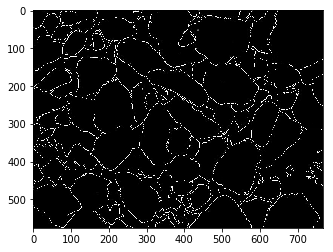

In [16]:
import matplotlib.pyplot as plt

image_y = cv2.imread("16_9_35_557_con2.jpg")
plt.imshow(image_y)
plt.show()

In [11]:
#Формируем массив с попиксельными значениями размеченного изображения (контур)
a = []
for i in range(576):
    for j in range (768):
        a.append(sum(image_y[i][j])/3)

In [12]:
df_answer = pd.DataFrame(a, columns =  ["answer"])

In [13]:
df_answer

,answer
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [ ]:
df_answer

In [17]:
answer = df_answer.values

In [39]:
len(answer)

442368

In [33]:
import PIL
import numpy
from PIL import Image

def resize_image(numpy_array_image, new_height):
    # convert nympy array image to PIL.Image
    image = Image.fromarray(numpy.uint8(numpy_array_image))
    old_width = image.size[0]
    old_height = image.size[1]
    ratio = float( new_height / old_height)
    new_width = int(old_width * ratio)
    #image = image.resize((576, 768), PIL.Image.ANTIALIAS)
    image = image.resize((new_width, new_height), PIL.Image.ANTIALIAS)
    # convert PIL.Image into nympy array back again
    return image

In [34]:
cont = resize_image(answer, 576)

In [38]:
len(cont)

TypeError: object of type 'Image' has no len()

In [ ]:
new_df = new_df.append(pd.DataFrame(ww.tolist(), columns =  [df_col]), ignore_index=True)

In [49]:
#Добавляем ответы к признаку

df_train = pd.concat([dff, df_answer], axis=1) 

In [50]:
df_train.head()

,auto_11,auto_12,auto_13,auto_21,auto_22,auto_23,auto_31,auto_32,auto_33,can_1_11,...,can_6_11,can_6_12,can_6_13,can_6_21,can_6_22,can_6_23,can_6_31,can_6_32,can_6_33,answer
0,-999,-999,-999,-999,0,0,-999,0,0,-999,...,-999,-999,-999,-999,0,0,-999,0,0,0.0
1,-999,-999,-999,0,0,0,0,0,0,-999,...,-999,-999,-999,0,0,0,0,0,0,0.0
2,-999,-999,-999,0,0,0,0,0,0,-999,...,-999,-999,-999,0,0,0,0,0,0,0.0
3,-999,-999,-999,0,0,0,0,0,0,-999,...,-999,-999,-999,0,0,0,0,0,0,0.0
4,-999,-999,-999,0,0,0,0,0,0,-999,...,-999,-999,-999,0,0,0,0,0,0,0.0


## Алгоритм логистической регрессии

In [56]:
df_train_2 = df_train.replace(-999, numpy.nan)

In [55]:
df_train_2.isnull().sum() #исследуем количество пропусков

auto_11     1343
auto_12      768
auto_13     1343
auto_21      576
auto_22        0
auto_23      576
auto_31     1343
auto_32      768
auto_33     1343
can_1_11    1343
can_1_12     768
can_1_13    1343
can_1_21     576
can_1_22       0
can_1_23     576
can_1_31    1343
can_1_32     768
can_1_33    1343
can_2_11    1343
can_2_12     768
can_2_13    1343
can_2_21     576
can_2_22       0
can_2_23     576
can_2_31    1343
can_2_32     768
can_2_33    1343
can_3_11    1343
can_3_12     768
can_3_13    1343
            ... 
can_3_32     768
can_3_33    1343
can_4_11    1343
can_4_12     768
can_4_13    1343
can_4_21     576
can_4_22       0
can_4_23     576
can_4_31    1343
can_4_32     768
can_4_33    1343
can_5_11    1343
can_5_12     768
can_5_13    1343
can_5_21     576
can_5_22       0
can_5_23     576
can_5_31    1343
can_5_32     768
can_5_33    1343
can_6_11    1343
can_6_12     768
can_6_13    1343
can_6_21     576
can_6_22       0
can_6_23     576
can_6_31    1343
can_6_32     7

In [57]:
df_train_2.head()

,auto_11,auto_12,auto_13,auto_21,auto_22,auto_23,auto_31,auto_32,auto_33,can_1_11,...,can_6_11,can_6_12,can_6_13,can_6_21,can_6_22,can_6_23,can_6_31,can_6_32,can_6_33,answer
0,NaN,NaN,NaN,NaN,0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,0,0.0,NaN,0.0,0.0,0.0
1,NaN,NaN,NaN,0.0,0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,0.0,0,0.0,0.0,0.0,0.0,0.0
2,NaN,NaN,NaN,0.0,0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,0.0,0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,0.0,0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,0.0,0,0.0,0.0,0.0,0.0,0.0
4,NaN,NaN,NaN,0.0,0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,0.0,0,0.0,0.0,0.0,0.0,0.0


In [58]:
df_train_2.fillna(0, inplace=True) #замена пропусков нулями

In [59]:
df_train_2.head()

,auto_11,auto_12,auto_13,auto_21,auto_22,auto_23,auto_31,auto_32,auto_33,can_1_11,...,can_6_11,can_6_12,can_6_13,can_6_21,can_6_22,can_6_23,can_6_31,can_6_32,can_6_33,answer
0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0


In [60]:
df_train_2.columns

Index(['auto_11', 'auto_12', 'auto_13', 'auto_21', 'auto_22', 'auto_23',
       'auto_31', 'auto_32', 'auto_33', 'can_1_11', 'can_1_12', 'can_1_13',
       'can_1_21', 'can_1_22', 'can_1_23', 'can_1_31', 'can_1_32', 'can_1_33',
       'can_2_11', 'can_2_12', 'can_2_13', 'can_2_21', 'can_2_22', 'can_2_23',
       'can_2_31', 'can_2_32', 'can_2_33', 'can_3_11', 'can_3_12', 'can_3_13',
       'can_3_21', 'can_3_22', 'can_3_23', 'can_3_31', 'can_3_32', 'can_3_33',
       'can_4_11', 'can_4_12', 'can_4_13', 'can_4_21', 'can_4_22', 'can_4_23',
       'can_4_31', 'can_4_32', 'can_4_33', 'can_5_11', 'can_5_12', 'can_5_13',
       'can_5_21', 'can_5_22', 'can_5_23', 'can_5_31', 'can_5_32', 'can_5_33',
       'can_6_11', 'can_6_12', 'can_6_13', 'can_6_21', 'can_6_22', 'can_6_23',
       'can_6_31', 'can_6_32', 'can_6_33', 'answer'],
      dtype='object')

In [61]:
X = df_train_2.drop(('answer'), axis=1)  # Выбрасываем столбец 'class'.  
y = df_train_2['answer']
feature_names = X.columns

In [62]:
from sklearn.cross_validation import KFold

records_count = y.count() #  кросс-валидация по 5 блокам с перемешиванием
kf = KFold(n=records_count, n_folds=5, shuffle=True)

C:\Users\yaroslav\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [63]:
import math
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
scaledX = scaler.fit_transform(X) #генерация параметров и трансформация X модели обучения из данных обучения



def calc(estimator, trainX, trainY):
    predicted_trainY = estimator.predict_proba(trainX)[:, 1]
    #print(roc_auc_score(y, predicted_trainY))
    return roc_auc_score(trainY, predicted_trainY)
#тогда классификатор выведет вероятностную матрицу размерности (N, 2). Первый индекс относится к вероятности того, что данные относятся к классу 0, а второй относится к вероятности того, что данные принадлежат классу 1.


#Оценка путем перекрестной проверки для разных значений регуляризации
def Log_Regr_value(C_value):
    clf_log = LogisticRegression(penalty='l2', C=C_value)
    return cross_val_score(clf_log, scaledX, y, cv=kf, scoring=calc).mean()
#cv-генератор перекрестной проверки, оценкой является mean() ранее просчитанных выборок testX


def check_qual_log_diff_C():
    best_C = 0
    best_qual = 0    
    for i in range(-4, 2):
        C = math.pow(10, i)
        qual = Log_Regr_value(C)
        print('C=', C, ', quality=', qual)
        if qual > best_qual:
           best_qual = qual
           best_C = C
    return(best_C, best_qual)  


In [ ]:
the_best_log = check_qual_log_diff_C()
print('Лучшее качество =', the_best_log[1], 'при С=',  the_best_log[0])
new_C = the_best_log[0]

## Деление на train и test

In [ ]:
from sklearn import ensemble
from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaledX, y, test_size = 0.2, random_state = 11)

clf_log = LogisticRegression(penalty='l2', C=new_C)
clf_log.fit(x_train, y_train)



## Предсказание 

In [ ]:
y_log_score = clf_log.predict_proba(x_test)[:, 1]

## Оценка

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

plt.figure()
line_width = 2
fpr, tpr, thresholds = roc_curve(y_test, y_log_score)
plt.plot(fpr, tpr, color='darkorange', lw=line_width, label='Log regr')
plt.plot([0, 1], [0, 1], color='navy', lw=line_width, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
auc = roc_auc_score(y_test, y_log_score)
print('auc: %.3f' % auc)

## Предсказание нового 

In [115]:
import cv2
import numpy as np
import pandas as pd
import argparse
import glob
from PIL import Image, ImageDraw #Подключим необходимые библиотеки. 


image_2 = cv2.imread("16_9_41_42.bmp")
gray = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY) 
blurred = cv2.GaussianBlur(gray, (3, 3), 0) 
can_2 = cv2.Canny(blurred, 135, 260) 
clf_log = LogisticRegression(penalty='l2', C=0.01)
im2, contours, hierarchy = cv2.findContours(can_2,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
dd = cv2.drawContours(image_2, contours, -1, (240,0,0), 3)
cv2.imshow("sdv", dd)
    

cv2.waitKey(0)
cv2.destroyAllWindows()